In [53]:
import pandas as pd
chemin = r"C:\Users\Rania\Desktop\Fromage.txt"
#\t pour lire le fichier chaque colonne est separée par une tabulation
#lire et stocke dans un objet de tableau df de pandas
df = pd.read_csv(chemin, delimiter="\t")
print(df.head())

      Fromages  calories  sodium  calcium  lipides  retinol  folates  \
0  CarredelEst       314   353.5     72.6     26.3     51.6     30.3   
1      Babybel       314   238.0    209.8     25.1     63.7      6.4   
2     Beaufort       401   112.0    259.4     33.3     54.9      1.2   
3         Bleu       342   336.0    211.1     28.9     37.1     27.5   
4    Camembert       264   314.0    215.9     19.5    103.0     36.4   

   proteines      cholesterol   magnesium  Unnamed: 10  Unnamed: 11  
0           21.0            70         20          NaN          NaN  
1           22.6            70         27          NaN          NaN  
2           26.6           120         41          NaN          NaN  
3           20.2            90         27          NaN          NaN  
4           23.4            60         20          NaN          NaN  


In [54]:
#Affiche type de données de chaque colonne du tableau
print(df.dtypes)


Fromages          object
calories           int64
sodium           float64
calcium          float64
lipides          float64
retinol          float64
folates          float64
proteines        float64
cholesterol        int64
magnesium          int64
Unnamed: 10      float64
Unnamed: 11      float64
dtype: object


In [55]:
# Affiche les résumés statistiques du tableau de données
print(df.describe())

         calories      sodium     calcium    lipides     retinol    folates  \
count   29.000000   29.000000   29.000000  29.000000   29.000000  29.000000   
mean   300.034483  210.086207  185.734483  24.158621   67.562069  13.010345   
std     91.914356  108.678923   72.528882   8.129642   24.163098  11.723339   
min     70.000000   22.000000   72.600000   3.400000   37.100000   1.200000   
25%    292.000000  140.000000  132.900000  23.400000   51.600000   4.900000   
50%    321.000000  223.000000  202.300000  26.300000   62.300000   6.400000   
75%    355.000000  276.000000  220.500000  29.100000   76.400000  21.100000   
max    406.000000  432.000000  334.600000  33.300000  150.500000  36.400000   

       proteines      cholesterol   magnesium  Unnamed: 10  Unnamed: 11  
count      29.000000     29.000000  29.000000          0.0          0.0  
mean       20.168966     74.586207  26.965517          NaN          NaN  
std         6.959788     28.245755  11.318388          NaN        

In [56]:
#skiprows pour spécifier la 1ére ligne doit etre ignorées
#usecols pour spécifier les colonnes à inclure dans le tableau 
# "loadtxt()" de NumPy pour lire les données et les stocker dans un tableau multidimensionnel appelé "data".
import numpy as np

data = np.loadtxt('C:\\Users\\Rania\\Desktop\\Fromage.txt', delimiter='\t', skiprows=1, usecols=range(1,10))


print("Dimensions du tableau de données:", data.shape)

Dimensions du tableau de données: (29, 9)


In [57]:
#supprime la 1ére colonne du tableau axis signifie que la colonne doit etre supprimé le long de l'axe des colonnes
data = np.delete(data, 0, axis=1)

In [58]:
print("Dimensions du tableau de données:", data.shape)

Dimensions du tableau de données: (29, 8)


In [59]:
# convertit les données du tableau en des valeurs flottante par array 
data = np.array(data, dtype=float)

In [60]:
print(data[:5])

[[353.5  72.6  26.3  51.6  30.3  21.   70.   20. ]
 [238.  209.8  25.1  63.7   6.4  22.6  70.   27. ]
 [112.  259.4  33.3  54.9   1.2  26.6 120.   41. ]
 [336.  211.1  28.9  37.1  27.5  20.2  90.   27. ]
 [314.  215.9  19.5 103.   36.4  23.4  60.   20. ]]


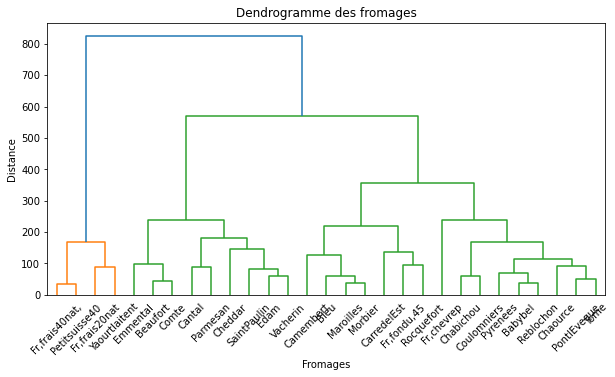

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Charger les données depuis le fichier texte
data = np.loadtxt(r'C:\Users\Rania\Desktop\Fromage.txt', delimiter='\t', skiprows=1, usecols=range(1,10))
fromages = np.genfromtxt(r'C:\Users\Rania\Desktop\Fromage.txt', delimiter='\t', skip_header=1, usecols=[0], dtype=str)

# Calculer la matrice de distance et effectuer l'agglomération hiérarchique
A = linkage(data, method='ward', metric='euclidean')

# Afficher le dendrogramme
plt.figure(figsize=(10, 5))
plt.title("Dendrogramme des fromages")
plt.xlabel("Fromages")
plt.ylabel("Distance")
dendrogram(A, labels=fromages)
plt.show()



C:\Users\Rania\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


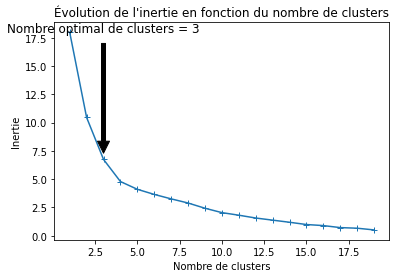

In [62]:
# Détermination du nombre optimal de clusters
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
# inertia pour stocker *somme des distances au carré entre chaque point et son centre de cluster assigné
# Préparation des données
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Calcul de la courbe du coude
inertia = []
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(data_scaled)
    inertia.append(kmeans.inertia_)

    # Recherche du coude de la courbe d'inertie
    diff_inertia = [inertia[i] - inertia[i-1] for i in range(1, len(inertia))]
    diff_inertia.insert(0, 0)
    diff2_inertia = [diff_inertia[i] - diff_inertia[i-1] for i in range(1, len(diff_inertia))]
    diff2_inertia.insert(0, 0)
    optimal_k = diff2_inertia.index(max(diff2_inertia)) + 1

# Affichage de la courbe d'inertie avec le nombre optimal de clusters
plt.plot(range(1, 20), inertia, marker='+')
plt.annotate(f'Nombre optimal de clusters = {optimal_k}', xy=(optimal_k, inertia[optimal_k-1]), xytext=(optimal_k, inertia[0]), 
             arrowprops=dict(facecolor='black', shrink=0.05), fontsize=12, horizontalalignment='center')
plt.title('Évolution de l\'inertie en fonction du nombre de clusters')
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie')
plt.show()

In [63]:
from sklearn.cluster import KMeans

# Initialiser le modèle K-means avec k=3clusters
kmeans = KMeans(n_clusters=3, random_state=0)

# Effectuer le K-means
kmeans.fit(data)

# Afficher les étiquettes de cluster attribuées à chaque fromage
print(kmeans.labels_)

[2 2 0 2 2 0 2 2 0 0 2 0 0 1 2 1 1 2 2 0 1 2 2 2 2 0 2 0 1]


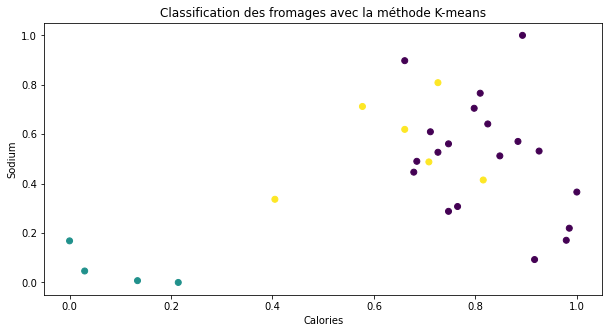

In [64]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(data_scaled)

# Affichage des résultats
plt.figure(figsize=(10, 5))
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=kmeans.labels_)
plt.title("Classification des fromages avec la méthode K-means")
plt.xlabel("Calories")
plt.ylabel("Sodium")
plt.show()

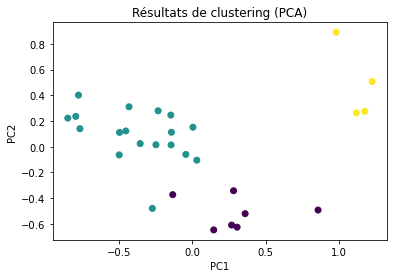

In [65]:

from sklearn.decomposition import PCA

# Réduire la dimensionnalité des données à l'aide de l'ACP
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

# Ajouter une colonne de cluster aux données
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data_scaled)
data_pca = pd.DataFrame(data_pca, columns=['PC1', 'PC2'])
data_pca['cluster'] = kmeans.labels_

# Tracer les données avec une couleur différente pour chaque cluster
plt.scatter(data_pca['PC1'], data_pca['PC2'], c=data_pca['cluster'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Résultats de clustering (PCA)')
plt.show()

C:\Users\Rania\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Rania\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Rania\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Rania\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Window

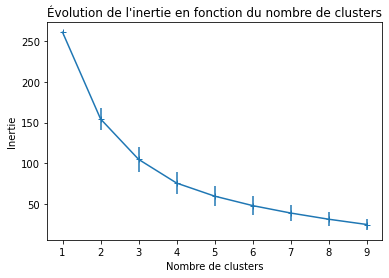

In [28]:
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
# Nombre de bootstrap à effectuer
n_bootstraps = 10

# Liste pour stocker les inerties pour chaque bootstrap
boot_inertia = []

# Boucle pour effectuer les bootstraps
for i in range(n_bootstraps):
    # Échantillonnage avec remplacement
    bootstrap_sample = resample(data, replace=True)
    
    # Centrage et réduction
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(bootstrap_sample)
    
    # Calcul de l'inertie pour chaque nombre de clusters
    inertia = []
    for k in range(1, 10):
        kmeans = KMeans(n_clusters=k, random_state=0).fit(scaled_data)
        inertia.append(kmeans.inertia_)
    
    # Ajout de l'inertie pour ce bootstrap à la liste
    boot_inertia.append(inertia)

# Calcul de la moyenne et de l'écart-type des inerties pour chaque nombre de clusters
boot_inertia_mean = np.mean(boot_inertia, axis=0)
boot_inertia_std = np.std(boot_inertia, axis=0)

# Tracé de la courbe d'évolution de l'inertie en fonction du nombre de clusters avec la moyenne et l'écart-type
plt.errorbar(range(1, 10), boot_inertia_mean, yerr=boot_inertia_std, marker='+')
plt.title('Évolution de l\'inertie en fonction du nombre de clusters')
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie')
plt.show()

In [40]:
from sklearn.metrics import silhouette_score

# Ajuster le modèle KMeans aux données
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data_scaled)

# Calculer le score de silhouette
silhouette_avg = silhouette_score(data_scaled, kmeans.labels_)
print("Le score de silhouette moyen est :", silhouette_avg)

Le score de silhouette moyen est : 0.40607153264596574


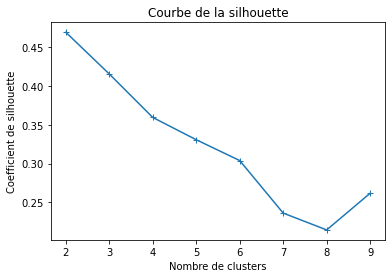

In [50]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Normalisation des données
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Calcul du coefficient de silhouette pour chaque nombre de clusters
silhouette_scores = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(data_scaled)
    labels = kmeans.labels_
    score = silhouette_score(data_scaled, labels)
    silhouette_scores.append(score)

# Affichage de la courbe de la silhouette
plt.plot(range(2, 10), silhouette_scores, marker='+')
plt.xlabel('Nombre de clusters')
plt.ylabel('Coefficient de silhouette')
plt.title('Courbe de la silhouette')
plt.show()